## Esercizio Classificazione NLP3 - Disaster Twitter Prediction



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/disaster.jpg" width="1200">

In [34]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/twitter_train.csv'

In [35]:
df = pd.read_csv(path)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [37]:
df['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [38]:
patterns = {
             r'\d+': '',             # remove digits (numeri)
            
             r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
             r'\b\w{1,2}\b':'',      # remove all token less than2 characters
             r'(http|www)[^\s]+':'', # remove website
             r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [39]:
df = clean_column(df, 'text', patterns)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [40]:
df['text'][0] 

'our deeds are the reason this earthquake may allah forgive all'

In [41]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [42]:
text = list(map(str, df['text'])) #trasformi la collonna in stringa 
text = ''.join(text)

In [48]:
Not_disaster = list(map(str, df[df['target']==0]['text']))
Disaster = list(map(str, df[df['target']==1]['text']))


Not_disaster= ''.join(Not_disaster)
Disaster = ''.join(Disaster)
df


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


(-0.5, 799.5, 399.5, -0.5)

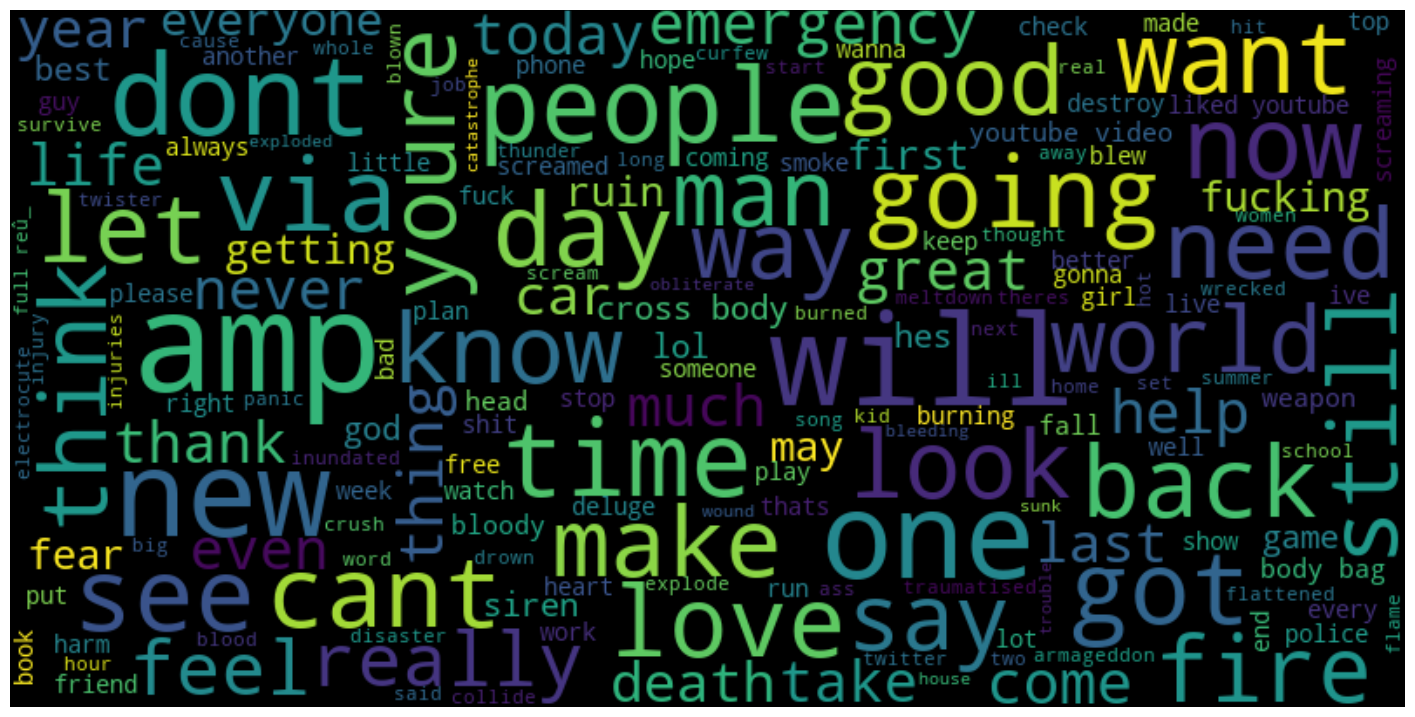

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(Not_disaster)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

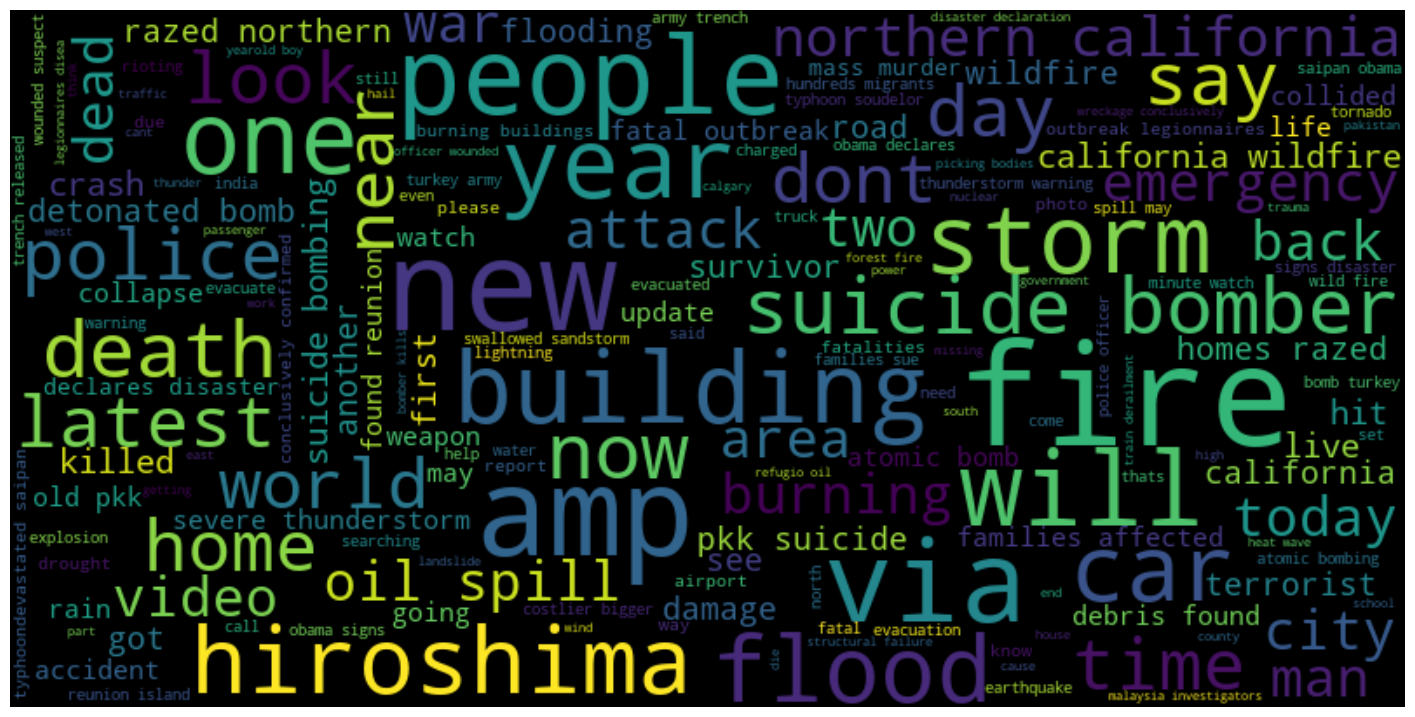

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(Disaster)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [51]:
df = df[['text', 'target']]
df

,text,target
0,our deeds are the reason this earthquake may a...,1
1,forest fire near ronge sask canada,1
2,all residents asked shelter place are being no...,1
3,people receive wildfires evacuation orders ca...,1
4,just got sent this photo from ruby alaska smok...,1
...,...,...
7608,two giant cranes holding bridge collapse into ...,1
7609,aria_ahrary thetawniest the out control wild f...,1
7610,utckm volcano hawaii,1
7611,police investigating after ebike collided with...,1


In [53]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [55]:
X = df['text']
y = df['target']
print(X.shape)

(7613,)


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X_vect.shape

(7613, 16640)

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 
# provo Random Forest
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.5880035026269702

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# questa è quella generica e inserisce lui le classi

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1299
           1       1.00      0.04      0.09       985

    accuracy                           0.59      2284
   macro avg       0.79      0.52      0.41      2284
weighted avg       0.76      0.59      0.45      2284



Text(95.72222222222221, 0.5, 'Actual')

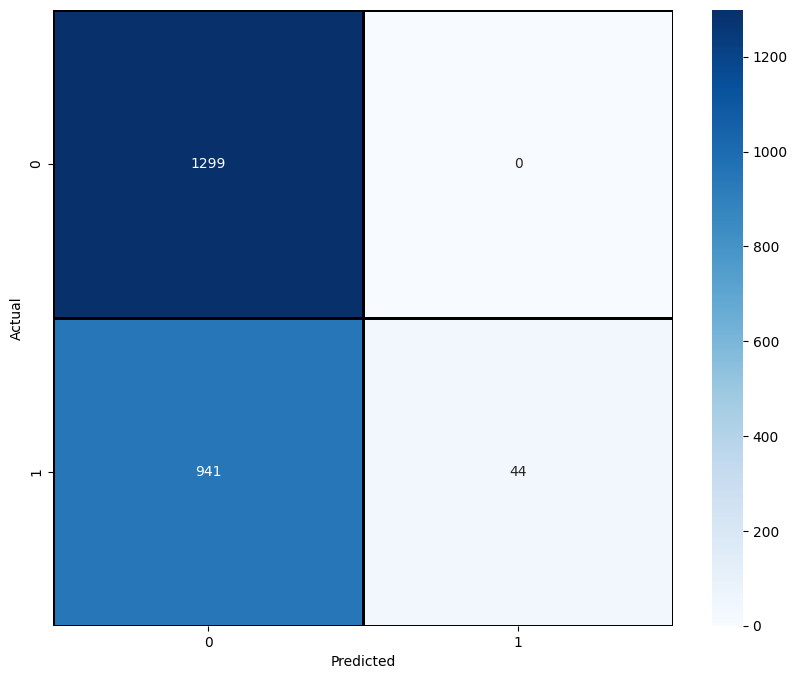

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 
#provo il Multinomiale
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.7745183887915937

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1299
           1       0.75      0.71      0.73       985

    accuracy                           0.77      2284
   macro avg       0.77      0.77      0.77      2284
weighted avg       0.77      0.77      0.77      2284



Text(95.72222222222221, 0.5, 'Actual')

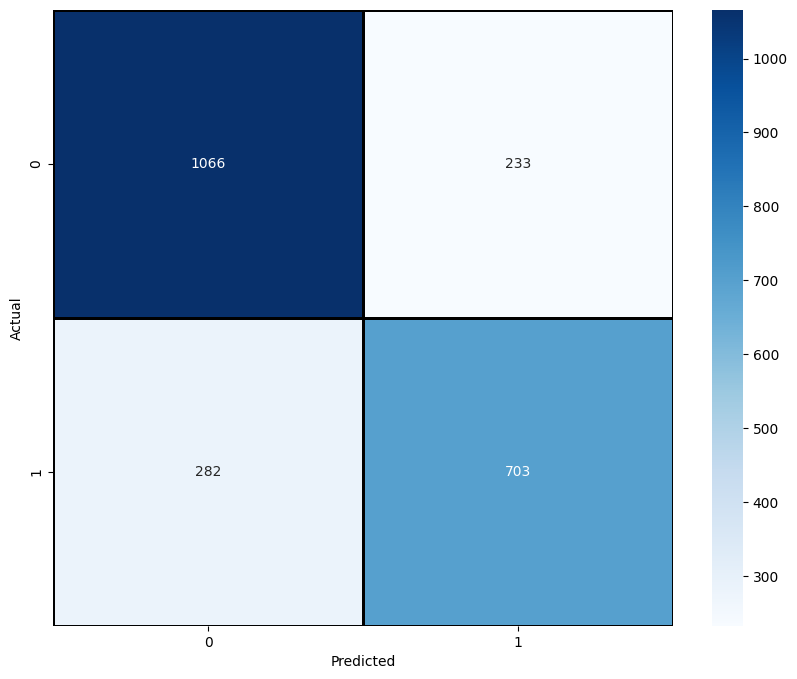

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [70]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.6825744308231173

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1299
           1       0.97      0.27      0.43       985

    accuracy                           0.68      2284
   macro avg       0.81      0.63      0.60      2284
weighted avg       0.78      0.68      0.63      2284



Text(95.72222222222221, 0.5, 'Actual')

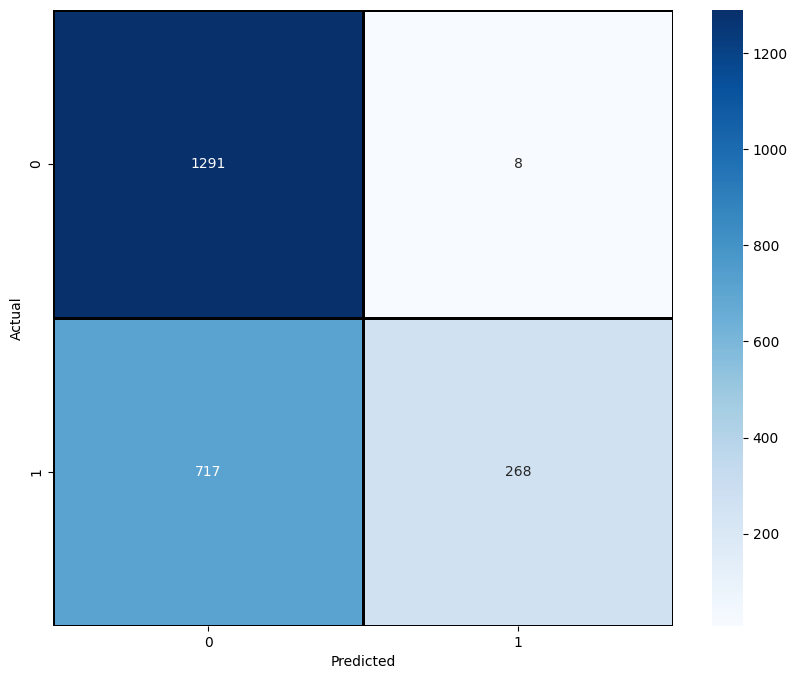

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer() #inserire modello migliore scelto
clf =MultinomialNB(alpha=1e-3)
#clf = classifier = MultinomialNB() #inserire modello migliore scelto dopo clf

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8025394045534151


In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.74579832 0.66071429 0.67436975 0.62289916 0.62605042 0.71713985
 0.70452156 0.73711882]
mean=0.6860765205135682
std=0.04451399064566075


In [79]:
import joblib
joblib.dump(pipe,'es3.pkl')

['es3.pkl']

In [83]:
import joblib

uploaded_model = joblib.load('es3.pkl')
pred = uploaded_model.predict(['earthquake']) # 1 --> Diabetic sono esempi
pred[0]

1